# Week 8 — Unsupervised Learning & Feature Engineering

**Goals**
- Clustering (KMeans), density (DBSCAN)
- Dimensionality reduction (PCA)
- Feature scaling and engineering

## 0) Setup

In [1]:
# !pip -q install pandas numpy scikit-learn matplotlib seaborn
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## 1) Load mall customers sample

In [2]:
import io
csv = io.StringIO('''CustomerID,Gender,Age,AnnualIncome,SpendingScore
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72
''')
df = pd.read_csv(csv)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2) Scale features & run KMeans

In [3]:
X = df[['Age','AnnualIncome','SpendingScore']].copy()
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42).fit(X_scaled)
labels = kmeans.labels_
sil = silhouette_score(X_scaled, labels)
sil

0.2666179149459862

## 3) Visualize clusters with PCA (2D)

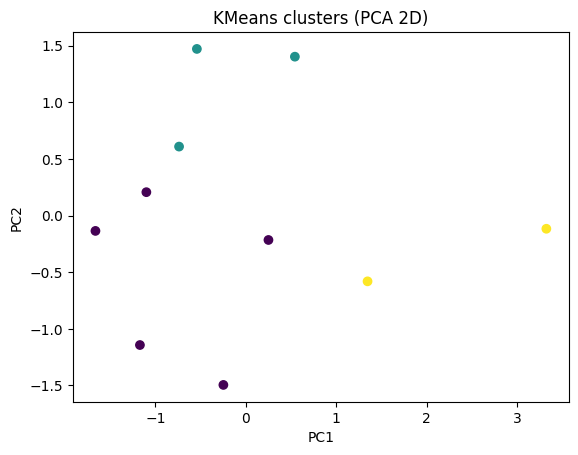

In [4]:
pca = PCA(n_components=2).fit(X_scaled)
X2 = pca.transform(X_scaled)
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=labels)
plt.title('KMeans clusters (PCA 2D)'); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()

## 4) DBSCAN (optional)

In [5]:
db = DBSCAN(eps=0.8, min_samples=3).fit(X_scaled)
labels_db = db.labels_
labels_db[:10]

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1])

## 5) Feature engineering ideas

- Create interaction terms (e.g., income_per_age = AnnualIncome / Age).

- One-hot encode Gender and re-run clustering.

- Use PCA components as inputs to KMeans and compare silhouette scores.